<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
house_data = pd.read_csv('train.csv')

# **[Problem 1] Selection of features for practice**
After loading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice.

In [ ]:
data = house_data.loc[:,['GrLivArea','YearBuilt','SalePrice']]
print("Null values of the data is \n{}".format(data.isnull().sum()))

X = data.loc[:,['GrLivArea','YearBuilt']].to_numpy()
y = data.loc[:,['SalePrice']].to_numpy()

Null values of the data is 
GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


# **[Problem 2] Estimation and evaluation by linear regression**
Easily analyze and preprocess data, create and execute a series of processes from linear regression learning, estimation, evaluation, and visualization.

It is common to use Mean Squared Error (MSE) as an index value for evaluation in regression problems.

Visualization can be done by using features on the horizontal axis and estimated house prices on the vertical axis.
Use scatter to create graphs that allow you to compare actual data with predicted results.

mean squared error is 1788152399.3891845
mean squared error is 42286.551046274566


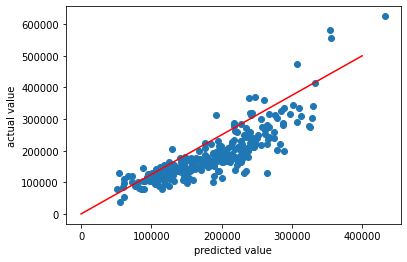

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

l_reg = LinearRegression().fit(x_train, y_train)
y_pred = l_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('mean squared error is {}'.format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print('mean squared error is {}'.format(mse))

fig , ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000),  color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

# **[Problem 3] Comparison of methods**
Please learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Briefly discuss the results using the table and visualization. Please state which method was good for which index value and what kind of figure it was.

*   linear regression
*   SVM
*   decision tree
*   random forest

The link to the official documentation is below. Originally, we will perform parameter tuning, but let's start with the default values.

SVMs, decision trees, and random forests are techniques that we also used for classification problems, but each library for regression problems is dedicated.



root mean square error:80432.47588980937
root mean square error:47148.19550455369
root mean square error:39760.706742426424


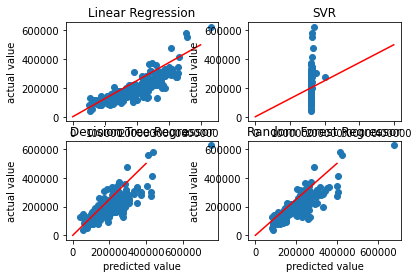

SVM is the worest one while linear regression is the best


In [ ]:
svm = SVR(kernel = 'poly')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
mse = mean_squared_error(y_test, svm_pred, squared= False)
print("root mean square error:{}".format(mse))


dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)
dt_reg_pred = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, dt_reg_pred, squared= False)
print("root mean square error:{}".format(mse))


rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg_pred = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, rf_reg_pred, squared= False)
print("root mean square error:{}".format(mse))


fig, ax = plt.subplots(2, 2)
ax[0][0].scatter(y_pred, y_test)
ax[0][0].plot((0, 400000), (0, 500000), color='red')
ax[0][0].set_xlabel('predicted value')
ax[0][0].set_ylabel('actual value')
ax[0][0].title.set_text('Linear Regression')

ax[0][1].scatter(svm_pred, y_test)
ax[0][1].plot((0, 400000), (0, 500000), color='red')
ax[0][1].set_xlabel('predicted value')
ax[0][1].set_ylabel('actual value')
ax[0][1].title.set_text('SVR')

ax[1][0].plot((0, 400000), (0, 500000), color='red')
ax[1][0].scatter(dt_reg_pred, y_test)
ax[1][0].set_xlabel('predicted value')
ax[1][0].set_ylabel('actual value')
ax[1][0].title.set_text('Decision Tree Regressor')

ax[1][1].scatter(rf_reg_pred, y_test)
ax[1][1].plot((0, 400000), (0, 500000), color='red')
ax[1][1].set_xlabel('predicted value')
ax[1][1].set_ylabel('actual value')
ax[1][1].title.set_text('Random Forest Regressor')
plt.show()

print("SVM is the worest one while linear regression is the best")

# **[Problem 4] (Advanced task) Learning using other feature values**
So far I've only used two features for practice, but see what happens when you add other features. Data analysis is important for how to select and process.

You can also refer to Kaggle's Notebooks.

Null values of the data is 
GrLivArea    0
YearBuilt    0
LotArea      0
SalePrice    0
dtype: int64
Feature added: root mean square error:1788152399.3891845
Feature added: root mean square error:42286.551046274566


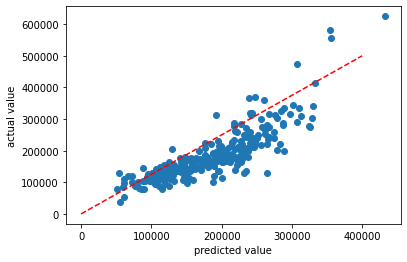

In [ ]:
data = house_data.loc[:,['GrLivArea', 'YearBuilt' , 'LotArea','SalePrice']]

print("Null values of the data is \n{}".format(data.isnull().sum()))


X = data.loc[:,['GrLivArea', 'YearBuilt', 'LotArea']].to_numpy()
y = data.loc[:, 'SalePrice'].to_numpy()

# Estimation and evaluation by linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Feature added: root mean square error:{}".format(mse))
mse = mean_squared_error(y_test, y_pred, squared= False)
print("Feature added: root mean square error:{}".format(mse))

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0, 400000), (0, 500000), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()